# 협업필터링(CF)

In [3]:
import surprise
import pandas as pd
import numpy as np
from surprise.model_selection import cross_validate

In [4]:
data = surprise.Dataset.load_builtin('ml-100k')

# 1. Collaborative Filtering

- k=40 : 이웃수
- min_k=1 : 최소 이웃수
- verbose=True : 결과를 자세히 보는 옵션
- bsl_options : 베이스라인 모형을 사용하는 경우 베이스라인 모형 옵션
- name : 유사도의 종류
- user-based : True 인경우 user-based CF,Fasle인 경우 item-based CF
- min_support : 두 사용자 또는 상품에서 공통적으로 있는 평점의 최소값

- sim_options : 유사도 기준(기본=MSD, cosine, pearson, pearson_baseline)

In [5]:
sim_param = {'name':'pearson', 
             'user_based':True, 
             'min_support':1, 
             'shrinkage':0}

In [6]:
bsl_param = {'method': 'als', 'n_epochs':5, 'reg_u':12, 'reg_i':5}

In [7]:
basic = surprise.KNNBasic(k=100, min_k=1, sim_options=sim_param, verbose=False)
w_mean = surprise.KNNWithMeans(k=100, min_k=1, sim_options=sim_param, verbose=False)
w_zscore = surprise.KNNWithZScore(k=100, min_k=1, sim_options=sim_param, verbose=False)
bsl = surprise.KNNBaseline(k=100, min_k=1, sim_options=sim_param, bsl_options=bsl_param, verbose=False)

In [8]:
models = [basic, w_mean, w_zscore, bsl]

In [9]:
acc = []
for model in models:
    cv = cross_validate(model, data)
    acc.append(cv['test_rmse'].mean())

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
model_name = ['basic','with Mean','with Zscore','with BSL']

Text(0.5, 0, 'Models')

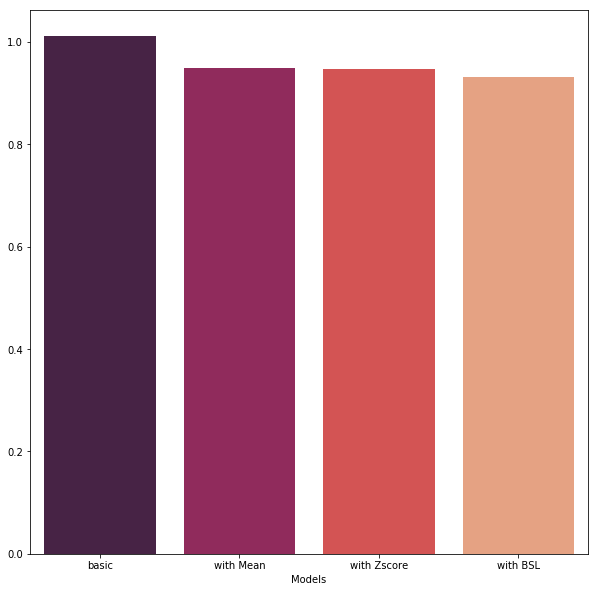

In [12]:
plt.figure(figsize=(10,10))
sns.barplot(x=model_name, y=acc, palette='rocket')
plt.xlabel('Models')